In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train[ 'Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [7]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [8]:
X_train[ 'Age_imputed'][X_train[ 'Age_imputed'].isnull()]

29    NaN
55    NaN
533   NaN
495   NaN
468   NaN
       ..
330   NaN
214   NaN
466   NaN
121   NaN
270   NaN
Name: Age_imputed, Length: 140, dtype: float64

In [9]:
X_train['Age'].isnull().sum()

140

In [10]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=42)
sampled_value

205    2.0
Name: Age, dtype: float64

In [11]:
X_train['Age_imputed'][X_train[ 'Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum(),random_state=42).values
X_test['Age_imputed'][X_test[ 'Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum(),random_state=42).values

In [12]:
X_train.isnull().sum()

Age            140
Fare             0
Age_imputed      0
dtype: int64

In [13]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,21.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


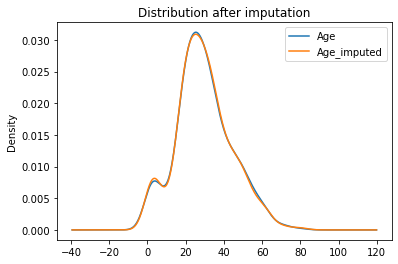

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train.Age.plot(kind='kde',ax=ax)
X_train.Age_imputed.plot(kind='kde',ax=ax)

lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, labels, loc='best')

plt.title('Distribution after imputation')
plt.show()

C:\Users\Nihar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nihar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


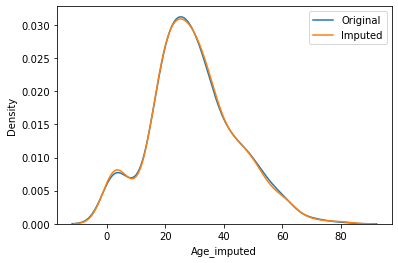

In [15]:
sns.distplot(X_train[ 'Age'],label='Original' ,hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()


In [16]:
print('Original variable variance: ', X_train['Age'].var())
print('Random Imputation variance: ', X_train['Age_imputed'].var())

Original variable variance:  210.2517072477438
Random Imputation variance:  210.47357118159263


In [17]:
X_train.cov()

,Age,Fare,Age_imputed
Age,210.251707,71.580633,210.251707
Fare,71.580633,2700.831981,54.857635
Age_imputed,210.251707,54.857635,210.473571


<AxesSubplot:>

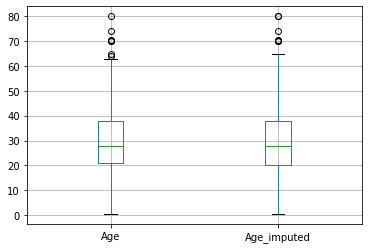

In [18]:
X_train[['Age','Age_imputed']].boxplot()

In [19]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [20]:
data.columns

Index(['FireplaceQu', 'GarageQual', 'SalePrice'], dtype='object')

In [21]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [22]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [23]:
X = data
y = data.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train['GarageQual_imputed'] = X_train.GarageQual
X_test['GarageQual_imputed'] = X_test.GarageQual

X_train['FireplaceQu_imputed'] = X_train.FireplaceQu
X_test['FireplaceQu_imputed'] = X_test.FireplaceQu

In [25]:
X_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
254,NaN,TA,145000,TA,NaN
1066,TA,TA,178000,TA,TA
638,NaN,NaN,85000,NaN,NaN
799,TA,TA,175000,TA,TA
380,Gd,TA,127000,TA,Gd
...,...,...,...,...,...
1095,Gd,TA,176432,TA,Gd
1130,TA,TA,135000,TA,TA
1294,NaN,TA,115000,TA,NaN
860,Gd,TA,189950,TA,Gd


In [26]:
X_train['GarageQual_imputed'][X_train[ 'GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum(),random_state=42).values
X_test['GarageQual_imputed'][X_test[ 'GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum(),random_state=42).values

X_train['FireplaceQu_imputed'][X_train[ 'FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum(),random_state=42).values
X_test['FireplaceQu_imputed'][X_test[ 'FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum(),random_state=42).values

C:\Users\Nihar\AppData\Local\Temp\ipykernel_17616\2815901813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train[ 'GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum(),random_state=42).values
C:\Users\Nihar\AppData\Local\Temp\ipykernel_17616\2815901813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test[ 'GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum(),random_state=42).values
C:\Users\Nihar\AppData\Local\Temp\ipykernel_17616\2815901813

In [27]:
temp = pd.concat([

X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
X_train['GarageQual_imputed'].value_counts() / len(X_train)],axis=1)

 

temp.colums = ['original', 'imputes']

 

C:\Users\Nihar\AppData\Local\Temp\ipykernel_17616\3239043275.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  temp.colums = ['original', 'imputes']


In [28]:
temp

,GarageQual,GarageQual_imputed
TA,0.951087,0.951199
Fa,0.032609,0.031678
Gd,0.011775,0.012842
Ex,0.002717,0.002568
Po,0.001812,0.001712


In [29]:
temp = pd.concat([

X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
X_train['FireplaceQu_imputed'].value_counts() / len(X_train)],axis=1)

 

temp.colums = ['original', 'imputes']
temp

C:\Users\Nihar\AppData\Local\Temp\ipykernel_17616\1054704463.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  temp.colums = ['original', 'imputes']


,FireplaceQu,FireplaceQu_imputed
Gd,0.491143,0.499144
TA,0.405797,0.401541
Fa,0.043478,0.042808
Ex,0.033816,0.032534
Po,0.025765,0.023973


C:\Users\Nihar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nihar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nihar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

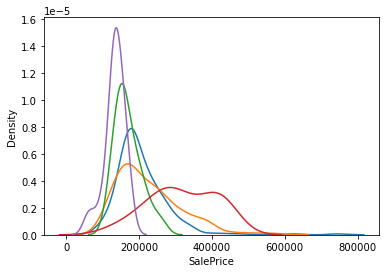

In [30]:
for cat in X_train.FireplaceQu.dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu']==cat]['SalePrice'],hist=False,label=cat)
    
plt.show()

C:\Users\Nihar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nihar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nihar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

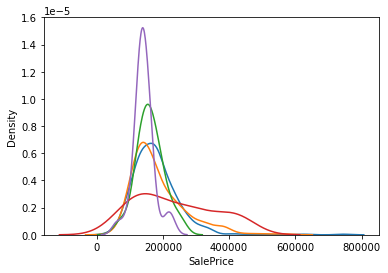

In [31]:
for cat in X_train.FireplaceQu_imputed.dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed']==cat]['SalePrice'],hist=False,label=cat)
    
plt.show()